# Visualization of Covid-19 cases in US and China

Practice on Covid-19 data.
 * First glance on the provided data.
 * Shows the situation of Covid-19 in US and China


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
from matplotlib.dates import DateFormatter

In [4]:
# data provided at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
url_covid_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_covid_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_covid_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
df_confirmed = pd.read_csv(url_covid_confirmed, sep=',')
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [6]:
df_death = pd.read_csv(url_covid_death, sep=',')
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,43,47,50,57,58,60,64,68,72,85
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,28,28,30,30,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,415,419,425,432,437,444,450,453,459,463
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,40,40,40,40,41,42,42,43,44,45
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
df_recovered = pd.read_csv(url_covid_recovered, sep=',')
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,188,188,207,220,228,252,260,310,331,345
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,394,403,410,422,431,455,470,488,519,531
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,344,344,344,385,398,423,468,468,472,493
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,7,7,11,11,11


In [8]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 107 entries, Province/State to 5/3/20
dtypes: float64(2), int64(103), object(2)
memory usage: 222.4+ KB


In [9]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 107 entries, Province/State to 5/3/20
dtypes: float64(2), int64(103), object(2)
memory usage: 222.4+ KB


In [10]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 107 entries, Province/State to 5/3/20
dtypes: float64(2), int64(103), object(2)
memory usage: 210.7+ KB


In [11]:
df_confirmed['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China

In [12]:
df_china_confirmed = df_confirmed.loc[df_confirmed['Country/Region']=='China', df_confirmed.columns[4:]].sum()
# df_china_confirmed

In [13]:
df_us_confirmed = df_confirmed.loc[df_confirmed['Country/Region']=='US', df_confirmed.columns[4:]].sum()
# df_us_confirmed

In [14]:
df_china_death = df_death.loc[df_confirmed['Country/Region']=='China', df_death.columns[4:]].sum()
# df_china_death

In [15]:
df_us_death = df_death.loc[df_confirmed['Country/Region']=='US', df_death.columns[4:]].sum()
# df_us_death

In [16]:
df_china_recovered = df_recovered.loc[df_recovered['Country/Region']=='China', df_recovered.columns[4:]].sum()
# df_china_recovered

In [17]:
df_us_recovered = df_recovered.loc[df_recovered['Country/Region']=='US', df_recovered.columns[4:]].sum()
# df_us_recovered

In [18]:
df = pd.DataFrame({'China_Confirmed': df_china_confirmed, 
                   'China_Death': df_china_death,
                   'China_Recovered': df_china_recovered,
                  'US_Confirmed': df_us_confirmed,
                  'US_Death': df_us_death,
                  'US_Recovered': df_us_recovered},
                  index=pd.to_datetime(df_china_confirmed.index))
df.head()

,China_Confirmed,China_Death,China_Recovered,US_Confirmed,US_Death,US_Recovered
2020-01-22,548,17,28,1,0,0
2020-01-23,643,18,30,1,0,0
2020-01-24,920,26,36,2,0,0
2020-01-25,1406,42,39,2,0,0
2020-01-26,2075,56,49,5,0,0


In [19]:
# Visualization
fig = plt.figure(figsize=(15,10))
gspec = gridspec.GridSpec(6, 8)

china = fig.add_subplot(gspec[0:3,0:5])
us = fig.add_subplot(gspec[3:,0:5], sharex=china)

confirmed = fig.add_subplot(gspec[:2, 5:])
death = fig.add_subplot(gspec[2:4, 5:], sharey=confirmed, sharex=confirmed)
recovered = fig.add_subplot(gspec[4:, 5:], sharey=confirmed, sharex=confirmed)

date_form = DateFormatter("%m-%d")

In [20]:
china.plot(df.index, df['China_Confirmed'], '--', color='red', label='Confirmed cases in China')
china.plot(df.index, df['China_Death'], '--', color='black', label='Death toll in China')
china.plot(df.index, df['China_Recovered'], '--', color='green', label='Recovered cases in China')

# labels = [item.get_text() for item in china.get_yticklabels()]
# print(labels)

china.margins(x=0)
china.set_yticklabels(['', '0', '20k', '40k', '60k', '80k', ''])
china.legend()
plt.setp(china.get_xticklabels(), visible=False)

us.plot(df.index, df['US_Confirmed'], color='red', label='Confirmed cases in US')
us.plot(df.index, df['US_Death'], color='black', label='Death cases in US')
us.plot(df.index, df['US_Recovered'], color='green', label='Recovered cases in US')

# labels = [item.get_text() for item in us.get_yticklabels()]
# print(labels)

us.legend()
us.margins(x=0)
us.set_yticklabels(['', '0', '200k', '400k', '600k', '800k', '1M', '1.2M', ''])
us.xaxis.set_major_formatter(date_form)

In [21]:
confirmed.plot(df.index, df['China_Confirmed'], '--', color='red')
confirmed.plot(df.index, df['US_Confirmed'], color='red')
death.plot(df.index, df['China_Death'], '--', color='black')
death.plot(df.index, df['US_Death'], color='black')
recovered.plot(df.index, df['China_Recovered'], '--', color='green')
recovered.plot(df.index, df['US_Recovered'], color='green')

plt.setp(confirmed.get_xticklabels(), visible=False)
plt.setp(death.get_xticklabels(), visible=False)
plt.setp(recovered.get_xticklabels(), rotation=17)

confirmed.set_yticklabels(['', '0', '200k', '400k', '600k', '800k', '1M', '1.2M', ''])
death.set_yticklabels(['', '0', '200k', '400k', '600k', '800k', '1M', '1.2M', ''])
recovered.set_yticklabels(['', '0', '200k', '400k', '600k', '800k', '1M', '1.2M', ''])
confirmed.yaxis.tick_right()
death.yaxis.tick_right()
recovered.yaxis.tick_right()
confirmed.margins(x=0)
death.margins(x=0)
recovered.margins(x=0)

recovered.xaxis.set_major_formatter(date_form)

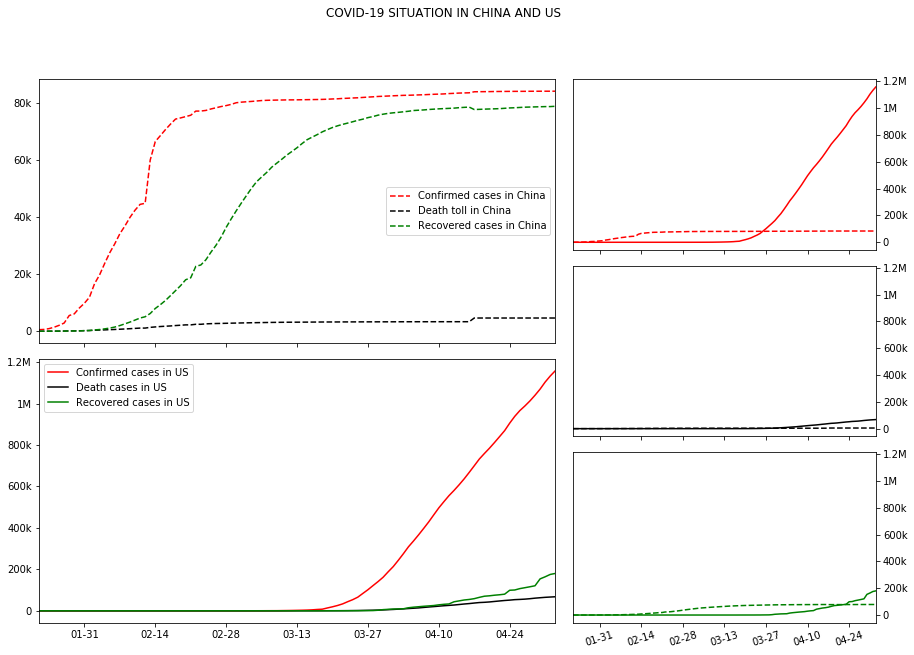

In [22]:
plt.margins(x=0)
fig.suptitle('Covid-19 situation in China and US'.upper())
plt.show()

In [245]:
# plt.savefig('Covid-19-US-China')

The figure describes the situation of Covid-19 in US and China. The two plots in the left show the situation in each country. With the stillness in the number of infected cases in nearly two months and the closeness between it and recovered cases, we can state that covid-19 is now under control in China. On the other hand, the outbreak in US began 2 months later and last till now with the number of cases increase dramatically. This is clearly a severe period in US.


The three right small plots compare US and China in the aspects of confirmed cases, recovered cases and death toll. Despite that the outbreak began first in China, the number of confirmed infected cases in US is 100-time higher than in China in total. Due to that, the number of recovered cases and death toll of US are also higher than one of China.